## Surprise Housing Advance Regression
### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [61]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

In [62]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [63]:
#display option for panda dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Reading and Understanding Data

In [64]:
# Read the csv data into a dataframe
df= pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
# Check the shape of data
df.shape

(1460, 81)

In [66]:
# Check the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
#Check basic stats
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [68]:
# Check the missing data
null_data = (df.isnull().sum()/len(df))*100
null_data = null_data.drop(null_data[null_data == 0].index)
null_data

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

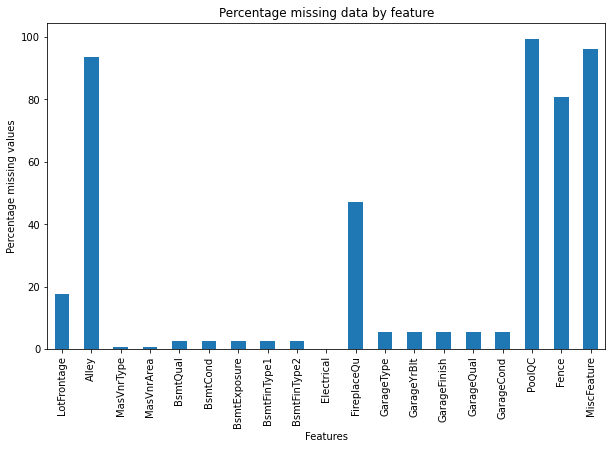

In [69]:
# Plot the percentage missing data by feature
plt.figure(figsize = (10,6))
null_data.plot.bar(ylabel = "Percentage missing values", xlabel = "Features", title="Percentage missing data by feature")
plt.show()

In [70]:
# Check all columns
allcols = df.columns
allcols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [71]:
# Check the numerical columns
num_cols = df.columns[df.dtypes == 'int64']
float_cols = df.columns[df.dtypes == float]
num_cols = num_cols.append(float_cols)
num_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [72]:
# Check the categorical columns
cat_cols = df.columns[df.dtypes == 'object']
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

### Missing Value Treatment

In [73]:
## There are features for which missing values are valid values. These missing values can be imputed with "NA" or "None".
# "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"

In [74]:
cols_for_nafill = ["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
df[cols_for_nafill] = df[cols_for_nafill].fillna("None")

In [75]:
# Check the missing data again
null_data = (df.isnull().sum()/len(df))*100
null_data = null_data.drop(null_data[null_data == 0].index)
null_data

LotFrontage    17.739726
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64

In [76]:
# Check the stats for LotFrontage feature
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [77]:
# Impute the missing value with median of LotFrontage. As mean and median are very near we can choose either of them
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace= True)
df["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [78]:
# Check the stats for MasVnrArea
df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [79]:
#Impute missing value with median as mean has very value compared to median which is 0. 
#This implies that there are outliers in the data.
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace = True)
df["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [80]:
#Check stats for Electrical
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [81]:
#Impute missing value with mode(most frequently used value) for Electrical
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace = True)
df["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [82]:
# Convert the Year column values to age values as relationship of sale price can be better defined with age of house
import datetime
df["HouseAge"] =datetime.datetime.now().year - df["YearBuilt"]

df["RemodelAge"]=datetime.datetime.now().year - df["YearRemodAdd"]

df["GarageAge"] = datetime.datetime.now().year - df["GarageYrBlt"]

In [83]:
# drop the "YearBuilt","YearRemodAdd","GarageYrBlt" columns
df = df.drop(["YearBuilt","YearRemodAdd","GarageYrBlt"], axis = 1)

# Id column can be dropped
df= df.drop("Id", axis = 1)

### Map numerical values to its categorical value

In [84]:
# map MSSubClass values to its categorical name
df["MSSubClass"] = df["MSSubClass"].map({20:"subclass1", 30:"subclass2", 40:"subclass3", 45:"subclass4",
                                                   50:"subclass5", 60:"subclass6", 70:"subclass7", 75:"subclass8",
                                                   80:"subclass9", 85:"subclass10", 90:"subclass11", 120:"subclass12",
                                                   150:"subclass13", 160:"subclass14", 180:"subclass15", 190:"subclass16"})

# OverallQual and OverallCond variable data can be considered as categorical as well as continuous data. 
# Treating the OverallQual and OverallCond data as continuous, therefore not mapping it to any string value


## Visualize data

### Visualize numerical variables

In [85]:
# Visualize these numerical variabes to check the relationship with Saleprice
condition_num_vars = ['LotFrontage','LotArea', 'OverallQual', 'OverallCond','HouseAge', 'RemodelAge','MasVnrArea']
basement_num_vars = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
floor_num_vars = ['1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea']
bath_bedroom_num_vars = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
garage_num_vars = ["Fireplaces","GarageAge","GarageCars","GarageArea"]
porch_num_vars = ["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]
misc_num_vars=['PoolArea', 'MiscVal', 'MoSold', 'YrSold']

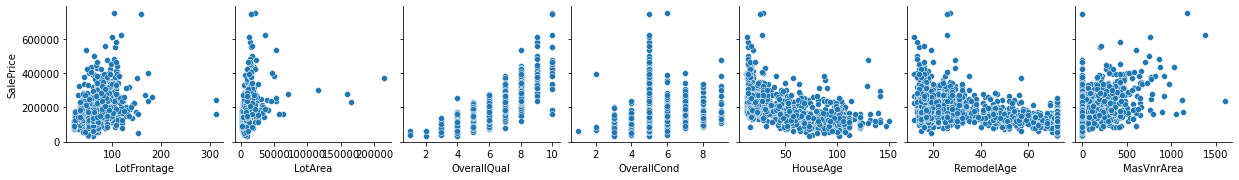

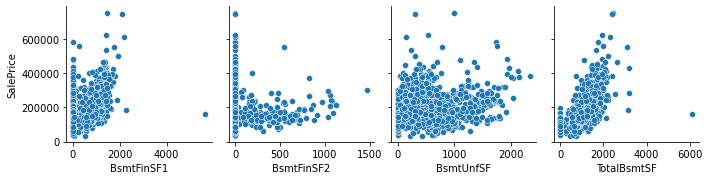

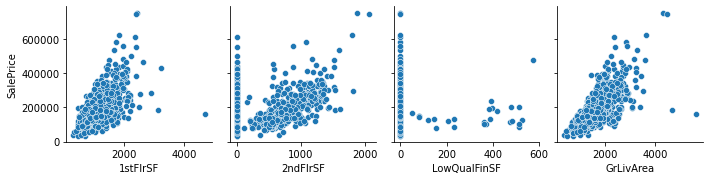

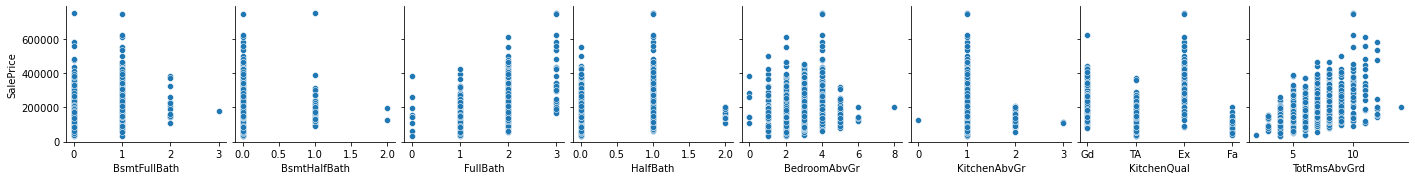

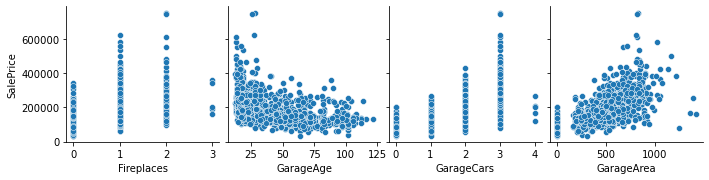

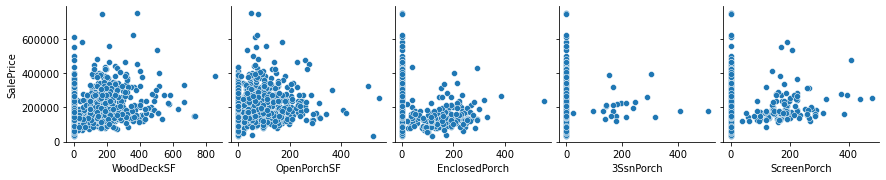

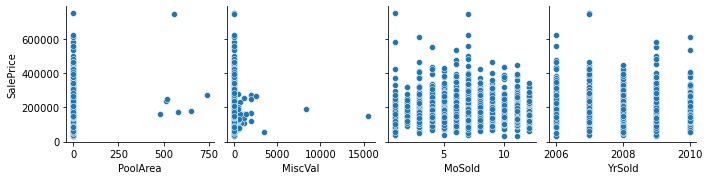

In [86]:
# Pairplot for numerical variables
sns.pairplot(df,x_vars = condition_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = basement_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = floor_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = bath_bedroom_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = garage_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = porch_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = misc_num_vars, y_vars = ["SalePrice"])
plt.show()

### Inference:
- There are outliers in LotFrontage, LotArea, MasVnrArea, BsmtFinSF1,LowQualFinSF, GrLivArea, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal
- There is linear relationship with SalePrice for HouseAge, RemodelAge, Total BsmtSF,1stFlrSF, 2ndFlrSF, GrLivArea
- Value across MoSold and YrSold seems almost constant


### Visualize categorical variable

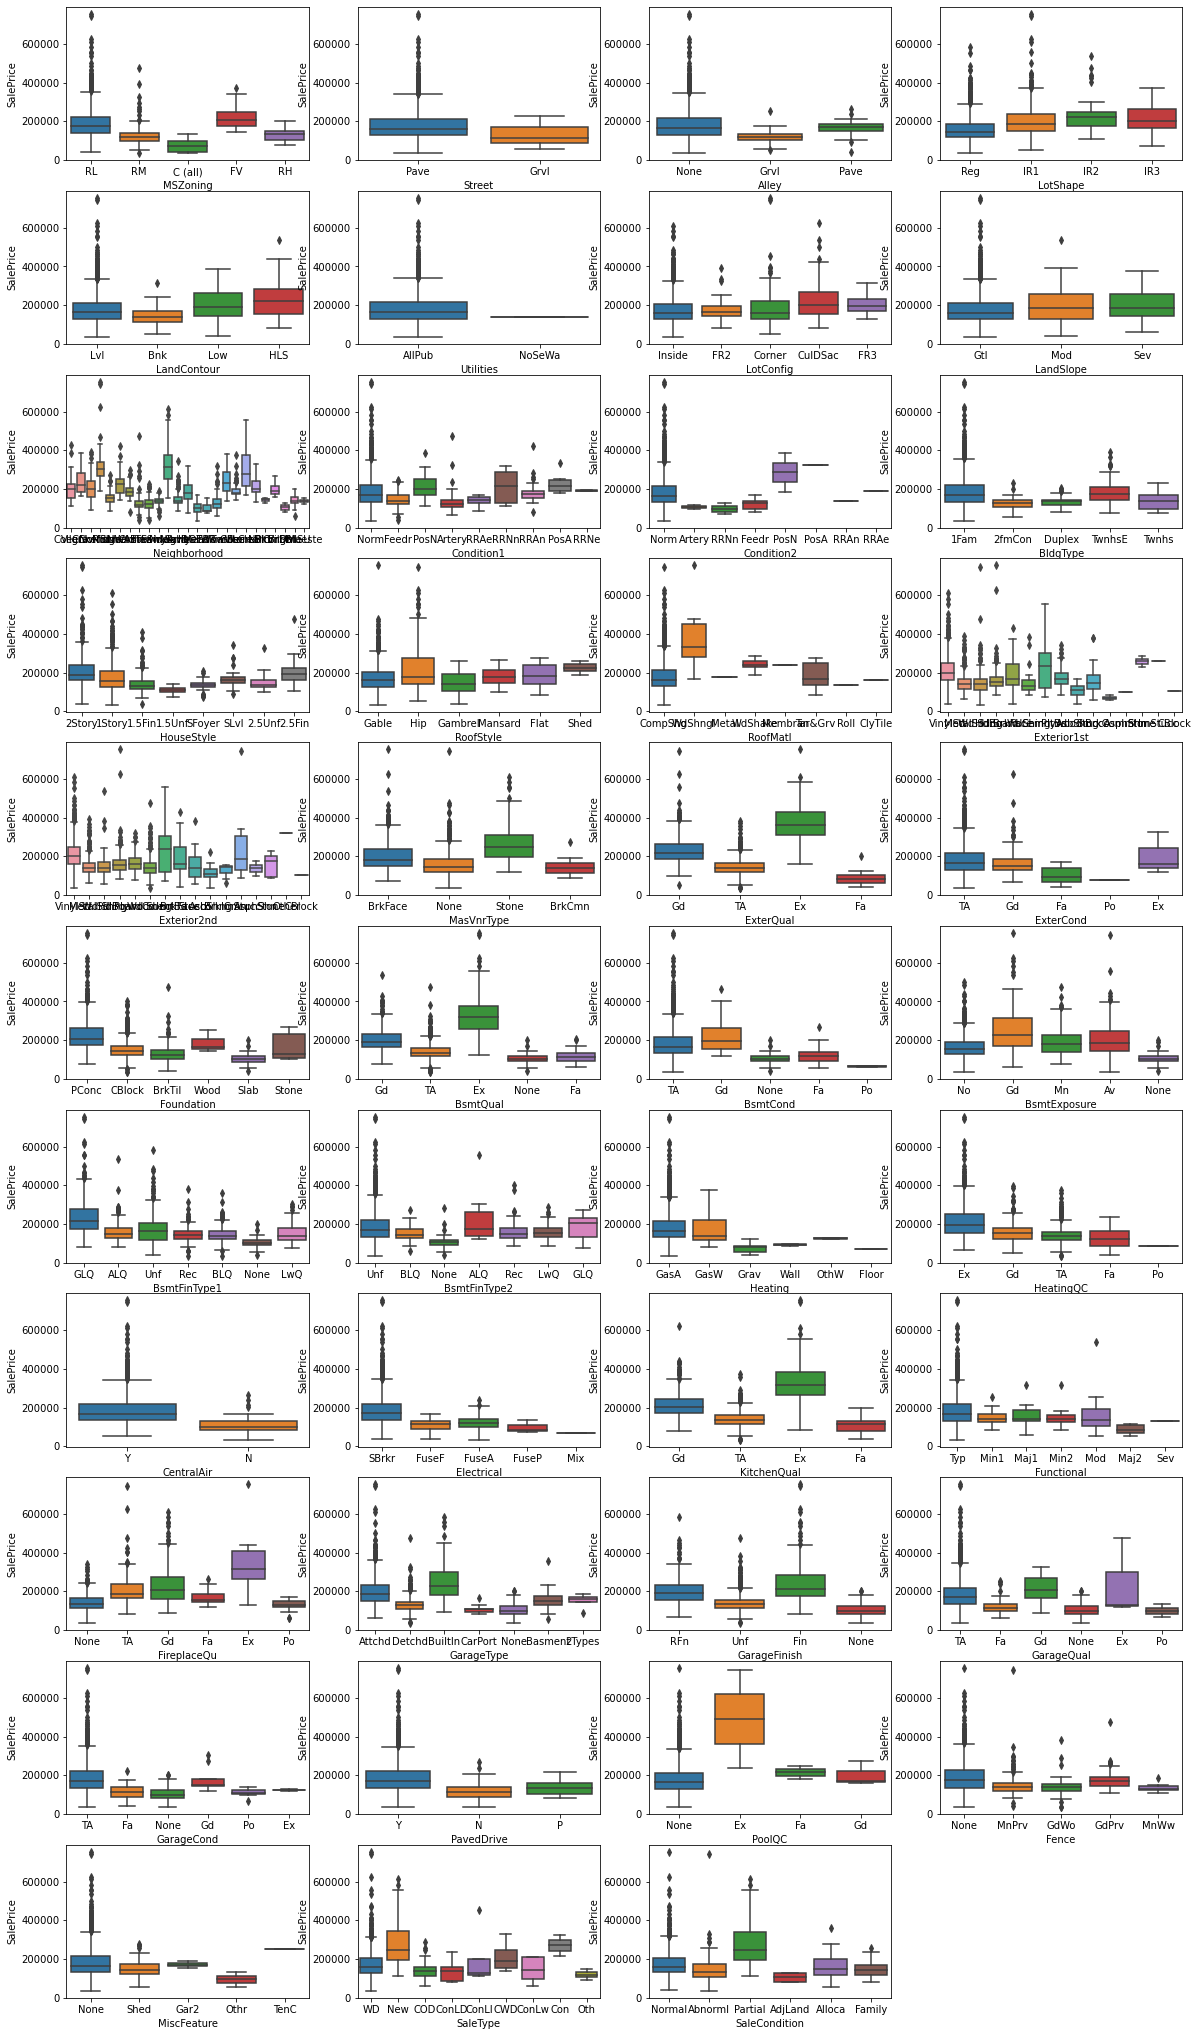

In [87]:
plt.figure(figsize = (20,40))
for i, catcol in enumerate(cat_cols):
    plt.subplot(12,4,i+1)
    sns.boxplot(x = catcol, y ='SalePrice', data = df)
plt.show()


### Inference
- Most of the houses have all the public utilities
- If the p roximity of house is near positive off-site feature--park, greenbelt, etc, then sale price is higher.
- House with Masonry veneer type 'stone' has high sale price
- House with excellent exterior material quality has high sale price
- House with excellent basement quality has high sale price
- House with excellent kitchen quality has high sale price
- House with excellent pool quality has high sale price



### Outlier Treatment

In [88]:
# Check the numerical columns
num_cols = df.columns[df.dtypes == 'int64']
float_cols = df.columns[df.dtypes == float]
num_cols = num_cols.append(float_cols)


# Find the outliers
outlier_df = []
res={}
index = 0
for feature in num_cols:
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    iqr = q3 - q1
    lr = q1 - 1.5 * iqr 
    ur = q3 + 1.5 * iqr
    res["Feature"] = feature
    res["LowerRange"] = lr
    res["UpperRange"] = ur
    res["Min"] = min(df[feature])
    res["Max"] = max(df[feature])
    res["OutlierCount"] = df[(df[feature] > ur) | (df[feature] < lr)].shape[0]
    outlier_df.append(res.copy())
    
pd.DataFrame(outlier_df).sort_values(by='OutlierCount', ascending=False)   

,Feature,LowerRange,UpperRange,Min,Max,OutlierCount
23,EnclosedPorch,0.000,0.000,0.0,552.0,208
4,BsmtFinSF2,0.000,0.000,0.0,1474.0,167
2,OverallCond,3.500,7.500,1.0,9.0,125
25,ScreenPorch,0.000,0.000,0.0,480.0,116
33,LotFrontage,31.500,107.500,21.0,313.0,106
34,MasVnrArea,-246.375,410.625,0.0,1600.0,98
12,BsmtHalfBath,0.000,0.000,0.0,2.0,82
22,OpenPorchSF,-102.000,170.000,0.0,547.0,77
0,LotArea,1481.500,17673.500,1300.0,215245.0,69
16,KitchenAbvGr,1.000,1.000,0.0,3.0,68


### Inference:
- Most of the numeric variables has outliers
- We should not drop these outliers as this will cause significnat data loss
- We should treat the outliers excludin the "SalePrice" target variable


In [89]:
# Treat the outlier values greater than upper range by setting it to upper range value
# Treat the outlier values lesser than lower range by setting it to lower range value
for outlier in outlier_df:
    if outlier["Feature"] !="SalePrice":
        feature = outlier["Feature"]
        ur = outlier["UpperRange"]
        lr = outlier["LowerRange"]
        df[feature] = np.where(df[feature] > ur,ur,df[feature])
        df[feature] = np.where(df[feature] < lr,lr,df[feature])
        

In [90]:
# Check the stats after tretaing the outliers
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,RemodelAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,69.090411,9647.388014,6.100685,5.543493,89.406336,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890,50.700685,37.134247,43.493836
std,17.231909,3594.356399,1.378430,0.963696,134.017553,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883,30.108397,20.645407,24.689725
min,31.500000,1481.500000,2.000000,3.500000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000,12.000000,12.000000,12.000000
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000,22.000000,18.000000,20.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000,49.000000,28.000000,42.000000
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000,68.000000,55.000000,61.000000
max,107.500000,17673.500000,10.000000,7.500000,410.625000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000,137.000000,72.000000,122.000000


### Inference
- After treating the outliers, we can observer that there are constant values in BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal
- We can drop these columns as hese will not contribute to the Saleprice prediction

In [91]:
# drop the columns with constant values
df= df.drop(["BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "KitchenAbvGr", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"], axis = 1)


In [92]:
# Check the stats again
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,HouseAge,RemodelAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,69.090411,9647.388014,6.100685,5.543493,89.406336,439.997517,563.777740,1050.254795,1157.018151,346.789041,1503.735873,0.425000,1.565068,0.382877,2.851712,6.487671,0.611301,1.765411,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890,50.700685,37.134247,43.493836
std,17.231909,3594.356399,1.378430,0.963696,134.017553,433.219435,431.710214,397.937878,362.583002,435.791621,481.375641,0.517373,0.550916,0.502885,0.759516,1.541916,0.638959,0.742753,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883,30.108397,20.645407,24.689725
min,31.500000,1481.500000,2.000000,3.500000,0.000000,0.000000,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,12.000000,12.000000,12.000000
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000,22.000000,18.000000,20.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000,49.000000,28.000000,42.000000
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000,68.000000,55.000000,61.000000
max,107.500000,17673.500000,10.000000,7.500000,410.625000,1780.625000,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,2.500000,3.000000,2.000000,4.500000,10.000000,2.500000,3.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000,137.000000,72.000000,122.000000


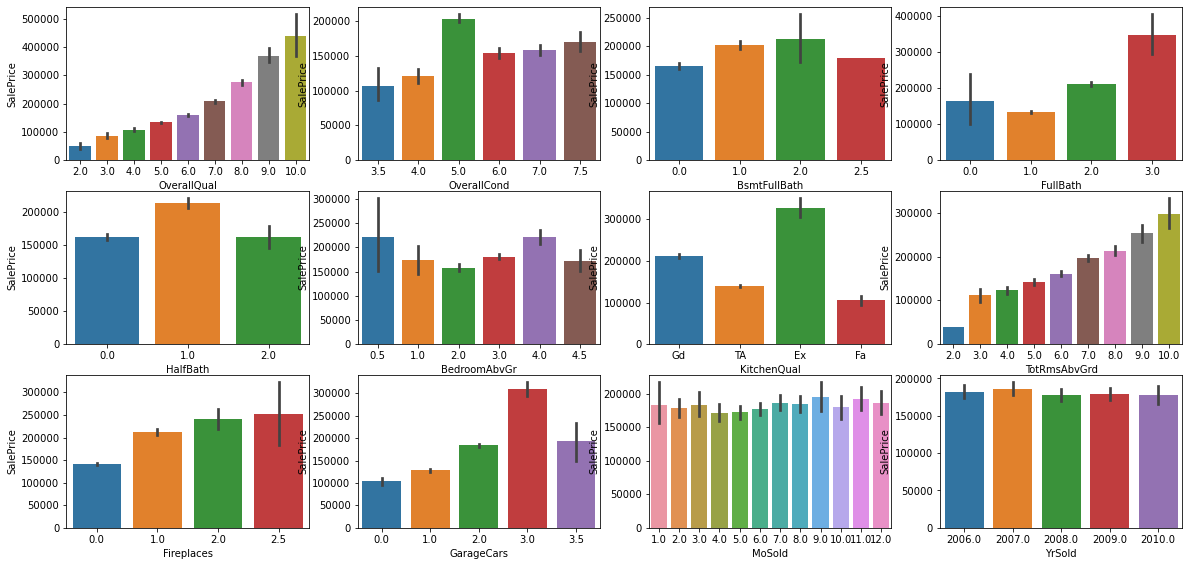

In [93]:
# Check the discrete value columns
discrete_cols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath','HalfBath', 'BedroomAbvGr', 
                 'KitchenQual','TotRmsAbvGrd',"Fireplaces","GarageCars","MoSold","YrSold"]


plt.figure(figsize = (20,40))
for i, col in enumerate(discrete_cols):
    plt.subplot(12,4,i+1)
    sns.barplot(x = col, y ='SalePrice', data = df)
plt.show()

### Inference:
- MoSold and YrSold does not show much change in SalePrice for different values. These columns can be dropped
- OverallQual shows a positive relationship(Better the quality, more the saleprice)
- SalePrice is highest for OverallCond = 5
- TotRmsAbvGrd shows positive relationship with saleprice( ore the number of rooms, more the saleprice)

In [94]:
# drop MoSold and YrSold column
df = df.drop(["MoSold","YrSold"], axis = 1)

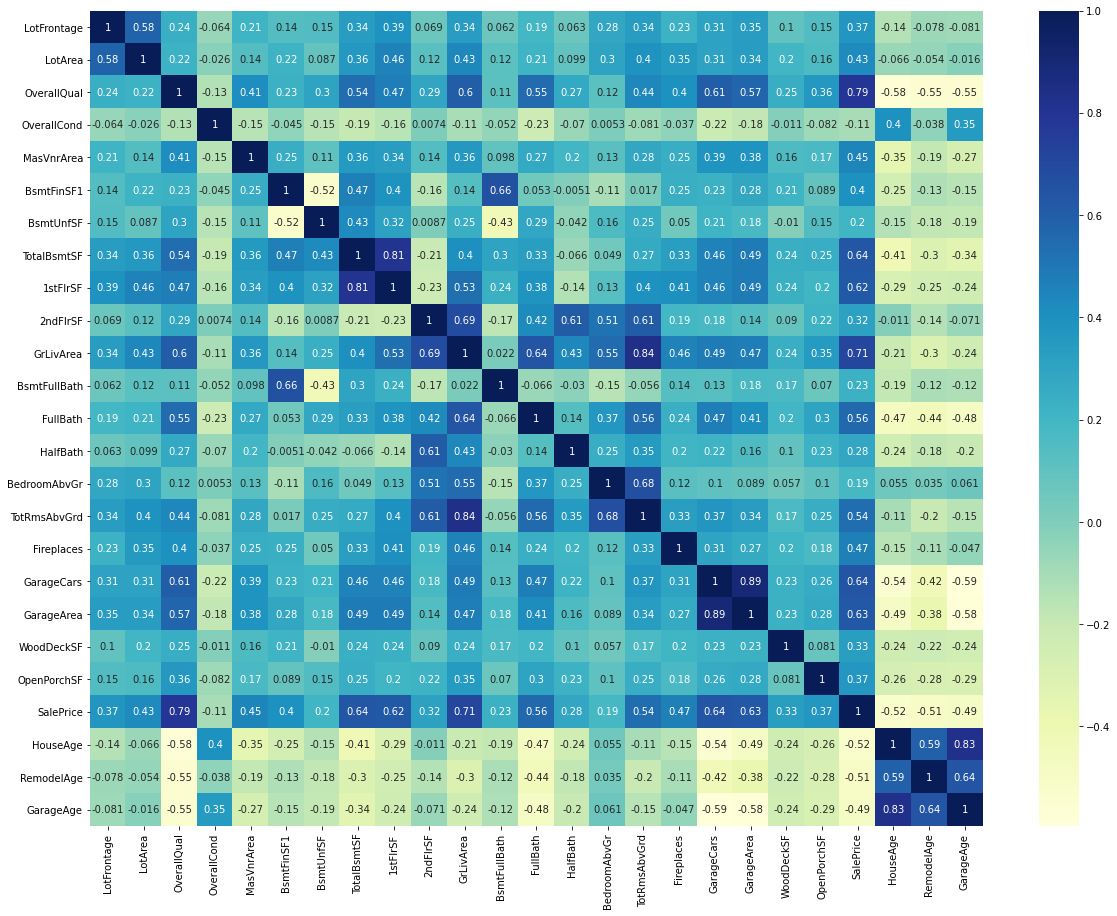

In [95]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap ="YlGnBu")
plt.show()

### Inference:
- OverallQual, TotlBsmtSF, 1stFlrSD, GrLivArea, GarageCars, garageArea has high correlation with SalePrice
- TotRmsAbvGrd and GrLivArea are highly correlated - 0.84
- TotRmsAbvGrd and BedroomAbvGrd is hishly correlated - 0.68
- GrLivArea and 2ndFlrSF are highly correlated - 0.69
- 1stFlrSF and TotBsmtSF is highly correlated - 0.81
- GarageCars and GarageArea is highly correlated - 0.89
- HouseAge and GarageAge is highly correlated - 0.84


In [96]:
# drop GarageCars as it is highly correlated with GarageArea
df = df.drop("GarageCars", axis = 1)

# drop GarageAge as it is highly correlated with HouseAge
df = df.drop("GarageAge", axis = 1)

# drop GrLivArea as it is highly correlated with TotRmsAbvGed
df = df.drop("GrLivArea", axis = 1)

# drop TotalBsmtSF as it is highly correlated with 1stFlrSF
df = df.drop("TotalBsmtSF", axis = 1)

In [97]:
df.shape

(1460, 65)

In [98]:
# Check the numerical columns
num_cols = df.columns[df.dtypes == 'int64']
float_cols = df.columns[df.dtypes == float]
num_cols = num_cols.append(float_cols)

In [99]:
# Find the columns having same value in 85% or more rows
cat_cols = df.columns[df.dtypes == 'object']
cat_cols_todrop = []
for col in cat_cols:
    if df[col].value_counts(1)[0] > 0.85:
        cat_cols_todrop.append(col)
print(cat_cols_todrop)

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']


In [100]:
# Drop the columns which have same value for more than 85% rows
df = df.drop(cat_cols_todrop, axis = 1)
df.shape

(1460, 44)

### Dummy Variable creation

In [101]:
# Check the categorical columns
cat_cols = df.columns[df.dtypes == 'object']
cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition'], dtype='object')

In [102]:
# Create the dummy variables for categorical variables
df = pd.get_dummies(df,cat_cols,drop_first = True)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge,RemodelAge,MSSubClass_subclass10,MSSubClass_subclass11,MSSubClass_subclass12,MSSubClass_subclass14,MSSubClass_subclass15,MSSubClass_subclass16,MSSubClass_subclass2,MSSubClass_subclass3,MSSubClass_subclass4,MSSubClass_subclass5,MSSubClass_subclass6,MSSubClass_subclass7,MSSubClass_subclass8,MSSubClass_subclass9,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,196.0,706.0,150.0,856.0,854.0,1.0,2.0,1.0,3.0,8.0,0.0,548.0,0.0,61.0,208500,19.0,19.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,6.0,7.5,0.0,978.0,284.0,1262.0,0.0,0.0,2.0,0.0,3.0,6.0,1.0,460.0,298.0,0.0,181500,46.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,7.0,5.0,162.0,486.0,434.0,920.0,866.0,1.0,2.0,1.0,3.0,6.0,1.0,608.0,0.0,42.0,223500,21.0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,

In [103]:
# Check the shape of dataset
df.shape

(1460, 170)

### Splitting the Data into Training and Testing Sets

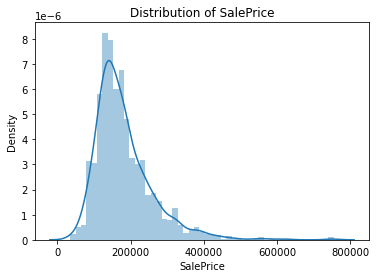

In [104]:
#Check the distribution of target variable "SalePrice"
sns.distplot(df["SalePrice"])
plt.title("Distribution of SalePrice")
plt.show()

***SalePrice distribution is right skewed. To apply the linear regression, the target variable should be normally distributed***

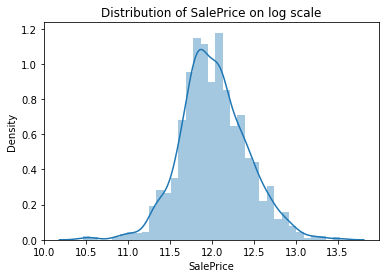

In [105]:
# Transform the saleprice on log scale and check the distribution
sns.distplot(np.log(df["SalePrice"]))
plt.title("Distribution of SalePrice on log scale")
plt.show()

#### Log transformed saleprice is normally distributed, hence can be used for linear regression model building

In [106]:
# remove the SalePrice and assign to variable X
X = df.drop("SalePrice", axis = 1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge,RemodelAge,MSSubClass_subclass10,MSSubClass_subclass11,MSSubClass_subclass12,MSSubClass_subclass14,MSSubClass_subclass15,MSSubClass_subclass16,MSSubClass_subclass2,MSSubClass_subclass3,MSSubClass_subclass4,MSSubClass_subclass5,MSSubClass_subclass6,MSSubClass_subclass7,MSSubClass_subclass8,MSSubClass_subclass9,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,196.0,706.0,150.0,856.0,854.0,1.0,2.0,1.0,3.0,8.0,0.0,548.0,0.0,61.0,19.0,19.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,6.0,7.5,0.0,978.0,284.0,1262.0,0.0,0.0,2.0,0.0,3.0,6.0,1.0,460.0,298.0,0.0,46.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,7.0,5.0,162.0,486.0,434.0,920.0,866.0,1.0,2.0,1.0,3.0,6.0,1.0,608.0,0.0,42.0,21.0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1

In [107]:
# Log transform the SalePrice and assign to variable y
y = np.log(df["SalePrice"])
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [108]:
# Split the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 169)
(439, 169)
(1021,)
(439,)


In [109]:
#Rescaling the features
scaler = MinMaxScaler()

# fit transform on training data
X_train_scaled_df = pd.DataFrame(data = scaler.fit_transform(X_train), columns = X_train.columns)

# only transform on test data
X_test_scaled_df = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

In [110]:
# Function to select top n features
def get_top_n_features(n):
    lm = LinearRegression()
    lm.fit(X_train_scaled_df, y_train)
    rfe = RFE(lm,n)
    rfe = rfe.fit(X_train_scaled_df,y_train)
    top_n_features = X_train_scaled_df.columns[rfe.support_]
    return top_n_features


In [111]:
# Get top 60,50,40 and 30 features
top_60_features = get_top_n_features(60)
top_50_features = get_top_n_features(50)
top_40_features = get_top_n_features(40)
top_30_features = get_top_n_features(30)


In [112]:
# Create a statsmodel Ordinary Least Square regression model for different set of features
def build_linearmodel(X_train_rfe):
    # Add a constant
    X_train_rfe_sm = sm.add_constant(X_train_rfe)

    # Create a first fitted model
    lr = sm.OLS(y_train.values.reshape(-1,1),X_train_rfe_sm)
    lr_model = lr.fit()

    # Print the summary
    print(lr_model.summary())

In [113]:
# Build linear model with 60 feature selection
build_linearmodel(X_train_scaled_df[top_60_features])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:33:09   Log-Likelihood:                 780.03
No. Observations:                1021   AIC:                            -1450.
Df Residuals:                     966   BIC:                            -1179.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.89

In [114]:
# Build linear model with 50 feature selection
build_linearmodel(X_train_scaled_df[top_50_features])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     223.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:33:09   Log-Likelihood:                 766.13
No. Observations:                1021   AIC:                            -1434.
Df Residuals:                     972   BIC:                            -1193.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.95

In [115]:
# Build linear model with 40 feature selection
build_linearmodel(X_train_scaled_df[top_40_features])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     269.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:33:09   Log-Likelihood:                 751.97
No. Observations:                1021   AIC:                            -1424.
Df Residuals:                     981   BIC:                            -1227.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.94

In [116]:
# Build linear model with 30 feature selection
build_linearmodel(X_train_scaled_df[top_30_features])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     324.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:33:09   Log-Likelihood:                 711.93
No. Observations:                1021   AIC:                            -1362.
Df Residuals:                     990   BIC:                            -1209.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.82

#### Optimal value for number of features can be considered as 40. Below that the r-squared and adjusted r-squared values are dropping more.

In [117]:
# dataframe for top 40 selected features
X_train_rfe = X_train_scaled_df[top_40_features]
X_test_rfe = X_test_scaled_df[top_40_features]

In [118]:
# Build a linear regression model
lm = LinearRegression()
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [119]:
def Checkmetric(y_pred_train, y_pred_test):
    print("R2 Score train = ", r2_score(y_train, y_pred_train))
    print("R2 Score test = ", r2_score(y_test, y_pred_test))

    print("RSS score train = ", np.sum(np.square(y_train - y_pred_train)))
    print("RSS score test = ", np.sum(np.square(y_test - y_pred_test)))

    print("RMSE score train = ",  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("RMSE score test = ", np.sqrt(mean_squared_error(y_test, y_pred_test)))

    metric = []
    metric.append(r2_score(y_train, y_pred_train))
    metric.append(r2_score(y_test, y_pred_test))
    metric.append(np.sum(np.square(y_train - y_pred_train)))
    metric.append(np.sum(np.square(y_test - y_pred_test)))
    metric.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    metric.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    return metric

In [120]:
# Check the different metrics
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

lrmetric = Checkmetric(y_pred_train,y_pred_test)


R2 Score train =  0.9145904483119726
R2 Score test =  0.8832658301848195
RSS score train =  13.703484028010116
RSS score test =  8.446147532958669
RMSE score train =  0.11585175787257032
RMSE score test =  0.13870658246963982


- LinearRegression model is able to achieve the r2 socre = 0.883 for test data which is very near to r2 score of train data.
- RMSE for the test data is 0.138, which means that the prediction made by the model can vary by 0.138 unit 

We will check if Ridge and Lasso regression further improves the r2 score of test data and avoids overfitting.

## Ridge and Lasso Regression

### Ridge Regression

In [121]:
# Perform Grid search cross validation for different value of alpha
params = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge =Ridge()
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.5}


### Optimum value of Ridge Regression lambda = 0.5

In [122]:
# Fit Ridge Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
ridge =Ridge(alpha = alpha)
ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.1412648   0.45188642  0.18285493  0.1903179   0.08617588  0.52562328
  0.45692626  0.08810803  0.14904243 -0.32938665 -0.10059124 -0.09030932
 -0.10405955 -0.09582985  0.30994612  0.30680553  0.32443685  0.27025661
 -0.08920384  0.09939622  0.06727976  0.12921046  0.14907217 -0.06918219
 -0.09719121  0.09457011  0.10803592  0.11412661  0.12445037  0.07289871
 -0.28796259  0.13225582  0.07611489  0.05345438 -0.09652339 -0.06950714
 -0.07223112 -0.09018321 -0.07223112 -0.0673768 ]


In [123]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

rgmetric = Checkmetric(y_pred_train,y_pred_test)


R2 Score train =  0.9140183498754577
R2 Score test =  0.8830731197220287
RSS score train =  13.79527401674424
RSS score test =  8.460090845379126
RMSE score train =  0.11623911496539172
RMSE score test =  0.13882102705324026


- Ridge Regression model is able to achieve the r2 socre = 0.883 for test data which is very near to r2 score of train data.
- RMSE for the test data is 0.138, which means that the prediction made by the model can vary by 0.138 unit 

### Lasso Regression

In [124]:
# Perform Grid search cross validation for different value of alpha
lasso =Lasso()
folds=5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


### Optimum value of Lasso Regression lambda = 0.0001¶

In [125]:
# Fit Lasso Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
lasso =Lasso(alpha = alpha)
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.13741621  0.46451349  0.18259109  0.18428879  0.07787974  0.5431946
  0.46272038  0.08706148  0.1466175  -0.33491352 -0.09788144 -0.09133756
 -0.10260642 -0.09068994  0.34246114  0.33481853  0.3499047   0.29536781
 -0.08333926  0.04274797  0.06496549  0.12643418  0.14631966 -0.06782759
 -0.08932504  0.08856626  0.10609824  0.10675085  0.11744877  0.06612008
 -0.2978476   0.12804956  0.06410367  0.02702304 -0.08458748 -0.06348388
 -0.10213939 -0.08163536 -0.03402845 -0.        ]


In [126]:
# Check the different metrics
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

lsmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.9140393498301809
R2 Score test =  0.8840253688092126
RSS score train =  13.791904691669348
RSS score test =  8.39119211340361
RMSE score train =  0.11622491911538765
RMSE score test =  0.13825459425405892


- Lasso Regression model is able to achieve the r2 socre = 0.884 for test data which is very near to r2 score of train data.
- RMSE for the test data is 0.138, which means that the prediction made by the model can vary by 0.138 unit 

In [127]:
# Compare the different metrics for Linear Regression, Ridge Regression and Lassoregression
metric_sr = pd.Series(["R2 Score (train)","R2 Score (test)","RSS (train)","RSS (test)","RMSE (train)","RMSE (test)"], name = "Metric")
lrmetric_sr = pd.Series(lrmetric, name = "LinearRegression")
rgmetric_sr = pd.Series(rgmetric, name = "RidgeRegression")
lsmetric_sr = pd.Series(lsmetric, name = "LassoRegression")

finalmetric = pd.concat([metric_sr,lrmetric_sr,rgmetric_sr,lsmetric_sr], axis = 1)
finalmetric

,Metric,LinearRegression,RidgeRegression,LassoRegression
0,R2 Score (train),0.914590,0.914018,0.914039
1,R2 Score (test),0.883266,0.883073,0.884025
2,RSS (train),13.703484,13.795274,13.791905
3,RSS (test),8.446148,8.460091,8.391192
4,RMSE (train),0.115852,0.116239,0.116225
5,RMSE (test),0.138707,0.138821,0.138255


### Inference:
- R2 score of test data for Linear, Ridge and Lasso is almost same.
- R2 score of test data is for Lasso Regression model is slightly better than others
- RMSE and RSS of test data for all the regression model is almost same

In [128]:
# Compare the coefficients
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas["Linear"] = lm.coef_
betas["Ridge(0.5)"] = ridge.coef_
betas["Lasso(0.0001)"] = lasso.coef_
betas.head(60)

,Linear,Ridge(0.5),Lasso(0.0001)
LotArea,0.140394,0.141265,0.137416
OverallQual,0.447266,0.451886,0.464513
OverallCond,0.180922,0.182855,0.182591
BsmtFinSF1,0.188768,0.190318,0.184289
BsmtUnfSF,0.082629,0.086176,0.077880
1stFlrSF,0.538165,0.525623,0.543195
2ndFlrSF,0.464026,0.456926,0.462720
BsmtFullBath,0.085046,0.088108,0.087061
GarageArea,0.145689,0.149042,0.146617
HouseAge,-0.337444,-0.329387,-0.334914


In [129]:
# Get the top 10 coefficients of Ridge regression model
betas[["Ridge(0.5)"]].sort_values(by = "Ridge(0.5)" , ascending = False)[0:10]

,Ridge(0.5)
1stFlrSF,0.525623
2ndFlrSF,0.456926
OverallQual,0.451886
MSZoning_RL,0.324437
MSZoning_FV,0.309946
MSZoning_RH,0.306806
MSZoning_RM,0.270257
BsmtFinSF1,0.190318
OverallCond,0.182855
Neighborhood_Crawfor,0.149072


In [130]:
# Get the top 10 coefficients of Lasso regression model
betas[["Lasso(0.0001)"]].sort_values(by = "Lasso(0.0001)" , ascending = False)[0:10]

,Lasso(0.0001)
1stFlrSF,0.543195
OverallQual,0.464513
2ndFlrSF,0.462720
MSZoning_RL,0.349905
MSZoning_FV,0.342461
MSZoning_RH,0.334819
MSZoning_RM,0.295368
BsmtFinSF1,0.184289
OverallCond,0.182591
GarageArea,0.146617


### We select the Lasso Regression model coefficnets for its slight better score of r2 score for test data


### Final Model

#### Top 10 features are :
- 1stFlrSF	  : First Floor square feet
- OverallQual : Overall material and finish of the house	
- 2ndFlrSF	  : Second floor square feet
- MSZoning_RL : Residential Low Density Zoning
- MSZoning_FV : Floating Village Residential zo	
- MSZoning_RH : Residential High Density zoning	
- MSZoning_RM : Residential Medium Density zoning	
- BsmtFinSF1  : Type 1 finished square feet	
- OverallCond : Overall condition of the house	
- GarageArea  : Size of garage in square feet
    

## Calculation For Subjective Question's Answer

### Question1: Impact of doubling the alpha for Ridge and Lasso 

In [131]:
# Fit Ridge Regression model for optimum value of lambda
alpha = 0.5*2
ridge =Ridge(alpha = alpha)
ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.14310268  0.45298818  0.18199401  0.19278458  0.08981999  0.51297685
  0.44936051  0.08927449  0.15268114 -0.32009257 -0.10431898 -0.08682218
 -0.09662557 -0.09746852  0.25036448  0.24691994  0.2722016   0.21504453
 -0.08465448  0.07279251  0.06660885  0.12630416  0.14721343 -0.07074212
 -0.09273474  0.09548342  0.10690188  0.11558966  0.11984535  0.06979354
 -0.21792336  0.13153704  0.04363775  0.04622662 -0.09617283 -0.06936088
 -0.07201496 -0.09222408 -0.07201496 -0.04977693]


In [132]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

rgmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.9131236526554238
R2 Score test =  0.882295597893256
RSS score train =  13.938823172808457
RSS score test =  8.516347416067104
RMSE score train =  0.11684232313180393
RMSE score test =  0.13928181732719483


In [133]:
# Fit Lasso Regression model for optimum value of lambda
alpha = 0.0001*2
lasso =Lasso(alpha = alpha)
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.13480916  0.48208792  0.18391438  0.18143265  0.07408251  0.54648204
  0.46045166  0.08763834  0.14720548 -0.33294689 -0.09838543 -0.08723348
 -0.09255451 -0.08697529  0.27565813  0.26483639  0.28931008  0.23110584
 -0.07181921  0.          0.06225152  0.12132887  0.14185544 -0.06852425
 -0.07621499  0.083365    0.10261338  0.10467833  0.10486635  0.0555589
 -0.18011489  0.12353107  0.          0.         -0.0711897  -0.05721171
 -0.09651911 -0.0747698  -0.03073385 -0.        ]


In [134]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

lsmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.9131236526554238
R2 Score test =  0.882295597893256
RSS score train =  13.938823172808457
RSS score test =  8.516347416067104
RMSE score train =  0.11684232313180393
RMSE score test =  0.13928181732719483


### Compare the metrics before and after doubling the alpha

In [135]:
rgmetric_sr_double = pd.Series(rgmetric, name = "RidgeRegression - Double Alpha")
lsmetric_sr_double = pd.Series(lsmetric, name = "LassoRegression - Double Alpha")

testmetric = pd.concat([metric_sr,rgmetric_sr,rgmetric_sr_double, lsmetric_sr,lsmetric_sr_double], axis = 1)
testmetric

,Metric,RidgeRegression,RidgeRegression - Double Alpha,LassoRegression,LassoRegression - Double Alpha
0,R2 Score (train),0.914018,0.913124,0.914039,0.913124
1,R2 Score (test),0.883073,0.882296,0.884025,0.882296
2,RSS (train),13.795274,13.938823,13.791905,13.938823
3,RSS (test),8.460091,8.516347,8.391192,8.516347
4,RMSE (train),0.116239,0.116842,0.116225,0.116842
5,RMSE (test),0.138821,0.139282,0.138255,0.139282


In [136]:
### Compare the coefficients before and after doubling the alpha
betas_after = pd.DataFrame(index=X_train_rfe.columns)
betas_after.rows = X_train_rfe.columns
betas_after["Linear"] = lm.coef_
betas_after["Ridge(1.0)"] = ridge.coef_
betas_after["Lasso(0.0002)"] = lasso.coef_
betas_after.head(60)

,Linear,Ridge(1.0),Lasso(0.0002)
LotArea,0.140394,0.143103,0.134809
OverallQual,0.447266,0.452988,0.482088
OverallCond,0.180922,0.181994,0.183914
BsmtFinSF1,0.188768,0.192785,0.181433
BsmtUnfSF,0.082629,0.089820,0.074083
1stFlrSF,0.538165,0.512977,0.546482
2ndFlrSF,0.464026,0.449361,0.460452
BsmtFullBath,0.085046,0.089274,0.087638
GarageArea,0.145689,0.152681,0.147205
HouseAge,-0.337444,-0.320093,-0.332947


In [137]:
# Get the top 10 coefficients of Ridge regression model
betas_after[["Ridge(1.0)"]].sort_values(by = "Ridge(1.0)" , ascending = False)[0:10]

,Ridge(1.0)
1stFlrSF,0.512977
OverallQual,0.452988
2ndFlrSF,0.449361
MSZoning_RL,0.272202
MSZoning_FV,0.250364
MSZoning_RH,0.246920
MSZoning_RM,0.215045
BsmtFinSF1,0.192785
OverallCond,0.181994
GarageArea,0.152681


In [138]:
# Get the top 10 coefficients of Lasso regression model
betas_after[["Lasso(0.0002)"]].sort_values(by = "Lasso(0.0002)" , ascending = False)[0:10]

,Lasso(0.0002)
1stFlrSF,0.546482
OverallQual,0.482088
2ndFlrSF,0.460452
MSZoning_RL,0.289310
MSZoning_FV,0.275658
MSZoning_RH,0.264836
MSZoning_RM,0.231106
OverallCond,0.183914
BsmtFinSF1,0.181433
GarageArea,0.147205


### Question3: Model comparison after dropping top 5 features

In [139]:
# Drop top 5 features : 1stFlrSF, OverallQual,2ndFlrSF, MSZoning_RL, MSZoning_FV
X_train_rfe = X_train_rfe.drop(["1stFlrSF","OverallQual","2ndFlrSF","MSZoning_RL","MSZoning_FV"], axis = 1)
X_test_rfe = X_test_rfe.drop(["1stFlrSF","OverallQual","2ndFlrSF","MSZoning_RL","MSZoning_FV"], axis = 1)

In [140]:
# Perform Grid search cross validation for different value of alpha
params = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge =Ridge()
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 2.0}


In [141]:
# Fit Ridge Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
ridge =Ridge(alpha = alpha)
ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.35855873  0.17575329  0.31389753  0.25137767  0.03719068  0.34056743
 -0.23291627 -0.20638386 -0.0609337  -0.01080017 -0.2340714   0.05318663
 -0.0189413  -0.07936231  0.07175339  0.06935686  0.12121785  0.23405166
 -0.08949636 -0.16846712  0.29910067  0.15701959  0.10612704  0.23347258
  0.06464523 -0.21007772  0.17513188  0.03605314  0.06473941 -0.23263189
 -0.14661304 -0.1270726  -0.23677621 -0.1270726  -0.06432567]


In [142]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

rgmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.8143384463340302
R2 Score test =  0.7663229957978014
RSS score train =  29.788356044418904
RSS score test =  16.90739271694302
RMSE score train =  0.1708088611186471
RMSE score test =  0.19624837080961535


In [143]:
# Perform Grid search cross validation for different value of alpha
lasso =Lasso()
folds=5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [144]:
# Fit Lasso Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
lasso =Lasso(alpha = alpha)
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.37321872  0.18324595  0.32485139  0.25844299  0.02610771  0.33995328
 -0.24296389 -0.20085361 -0.06126777 -0.01391146 -0.24135479  0.06120408
 -0.00776564 -0.08838473  0.12187084  0.0741835   0.12902356  0.24614635
 -0.08042601 -0.19083008  0.31153112  0.15762591  0.11326348  0.26536419
  0.06552236 -0.48255915  0.1830933   0.14590601  0.07608157 -0.25499939
 -0.15602358 -0.16319144 -0.24560321 -0.09698597 -0.09539744]


In [145]:
# Check the different metrics
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

lsmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.8161680226970791
R2 Score test =  0.766896121755003
RSS score train =  29.494810767883042
RSS score test =  16.86592494107964
RMSE score train =  0.16996517119710658
RMSE score test =  0.1960075595973681


### Compare the metrics before and after dropping top 5 features

In [146]:
rgmetric_sr_drop = pd.Series(rgmetric, name = "RidgeRegression - Drop Top5")
lsmetric_sr_drop = pd.Series(lsmetric, name = "LassoRegression - Drop Top5")

test1metric = pd.concat([metric_sr,rgmetric_sr,rgmetric_sr_drop, lsmetric_sr,lsmetric_sr_drop], axis = 1)
test1metric

,Metric,RidgeRegression,RidgeRegression - Drop Top5,LassoRegression,LassoRegression - Drop Top5
0,R2 Score (train),0.914018,0.814338,0.914039,0.816168
1,R2 Score (test),0.883073,0.766323,0.884025,0.766896
2,RSS (train),13.795274,29.788356,13.791905,29.494811
3,RSS (test),8.460091,16.907393,8.391192,16.865925
4,RMSE (train),0.116239,0.170809,0.116225,0.169965
5,RMSE (test),0.138821,0.196248,0.138255,0.196008


In [147]:
### Compare the coefficients before and after doubling the alpha
betas_afterdrop = pd.DataFrame(index=X_train_rfe.columns)
betas_afterdrop.rows = X_train_rfe.columns
betas_afterdrop["Ridge after drop"] = ridge.coef_
betas_afterdrop["Lasso after drop"] = lasso.coef_


In [148]:
# Get the top 10 coefficients of Ridge regression model
betas_afterdrop[["Ridge after drop"]].sort_values(by = "Ridge after drop" , ascending = False)[0:10]

,Ridge after drop
LotArea,0.358559
GarageArea,0.340567
BsmtFinSF1,0.313898
Neighborhood_NoRidge,0.299101
BsmtUnfSF,0.251378
Neighborhood_Crawfor,0.234052
Neighborhood_StoneBr,0.233473
OverallCond,0.175753
Exterior1st_BrkFace,0.175132
Neighborhood_NridgHt,0.157020


In [149]:
# Get the top 10 coefficients of Lasso regression model
betas_afterdrop[["Lasso after drop"]].sort_values(by = "Lasso after drop" , ascending = False)[0:10]

,Lasso after drop
LotArea,0.373219
GarageArea,0.339953
BsmtFinSF1,0.324851
Neighborhood_NoRidge,0.311531
Neighborhood_StoneBr,0.265364
BsmtUnfSF,0.258443
Neighborhood_Crawfor,0.246146
OverallCond,0.183246
Exterior1st_BrkFace,0.183093
Neighborhood_NridgHt,0.157626
